# Investment Analysis of Spark Funds Asset Management Company

In [1]:
# Importing libraries

import chardet
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Cleaning

In [2]:
# Find the encoding of companies data using chardet

data = open('./companies.txt','rb').read()
result = chardet.detect(data)
print(result['encoding'])

Windows-1254


In [3]:
# Find the encoding of rounds2 datausing chardet

data = open('./rounds2.csv','rb').read()
result = chardet.detect(data) 
print(result['encoding'])

Windows-1254


In [4]:
# Find the encoding of mapping datausing chardet

data = open('./mapping.csv','rb').read()
result = chardet.detect(data) 
print(result['encoding'])

ascii


#### Load Data

The python codec for windows-1254 is cp1254. But using cp1254 throws an error. The variant of ISO 8859-9 is cp1254. ISO 8859-9 is same as ISO 8859-1. ISO 8859-1 encoding can be used to resolve the issue.
<br><br>

In [5]:
# Load the companies data into a data frame as companies

#Windows-1254 is compatible with ISO 8859-9.

companies = pd.read_csv('./companies.txt', sep='\t', encoding = 'ISO 8859-1')

companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [6]:
# Remove special characters from permalink and name

companies['permalink'] = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
companies['name'] = companies.name.str.encode('utf-8').str.decode('ascii', 'ignore')

companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [7]:
# Load the rounds data into a data frame as rounds2

rounds2 = pd.read_csv('./rounds2.csv',  encoding = 'ISO 8859-1')

rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [8]:
# Remove special characters from company_permalink

rounds2['company_permalink'] = rounds2.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [9]:
# Unique companies present in rounds2

rounds2['company_permalink']  = rounds2['company_permalink'].str.lower()

print("Unique companies present in rounds2:",len(rounds2['company_permalink'].unique()))

Unique companies present in rounds2: 66368


In [10]:
# Unique companies present in companies

companies['permalink'] = companies['permalink'].str.lower()

print("Unique companies present in companies:",len(companies['permalink'].unique()))

Unique companies present in companies: 66368


In [11]:
# Unique key for each company

companies.nunique()

permalink        66368
name             66102
homepage_url     61191
category_list    27296
status               4
country_code       137
state_code         311
region            1092
city              5111
founded_at        3978
dtype: int64

In [12]:
#  Companies in the rounds2 file which are not present in companies

print("Companies in the rounds2 file which are not present in companies:",
      len(rounds2.loc[~rounds2['company_permalink'].isin(companies['permalink']),:]))
rounds2['company_permalink'].isin(companies['permalink']).value_counts()

Companies in the rounds2 file which are not present in companies: 0


True    114949
Name: company_permalink, dtype: int64

#### Merge Data Frames

In [13]:
# Merge the two data frames (comapanies and round2) as master_frame

master_frame = pd.merge(rounds2, companies, how = 'inner', left_on = 'company_permalink', right_on = 'permalink')

master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [14]:
# Observations present in master_frame

print("Observations present in master_frame:",len(master_frame.index))

Observations present in master_frame: 114949


In [15]:
# Drop the company_permalink column from master_frame as it is same as permalink

master_frame.drop(['permalink'], axis = 'columns', inplace=True)

master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(14)
memory usage: 14.0+ MB


#### Treating Missing Values in Columns

In [16]:
# Find columns with null values

master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [17]:
# Summing up the missing values

round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

<br>
<br>
Here the columns homepage_url, category_list, country_code,state_code, region, city, founded_at, funding_round_code, raised_amount_usd is found with missing values. <br><br> Out of which homepage_url, state_code, region, city, founded_at, funding_round_code is not required for this analysis, so it can be removed from data frame. <br><br> Even though the columns category_list, country_code, raised_amount_usd contains missing values, it cannot be removed as it is required for the data analysis. Therefore, the observations of these columns must be treated carefully.
<br>
<br>
<br>

In [18]:
# Remove columns with missing values not used for this analysis

master_frame = master_frame.drop(['homepage_url', 'state_code', 'region', 'city', 'founded_at', 'funding_round_code'], axis = 1)

master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 9 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
name                       114948 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
dtypes: float64(1), object(8)
memory usage: 8.8+ MB


In [19]:
# Summing up the missing values after removing the columns with missing values

round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
dtype: float64

#### Treating Missing Values in Rows

Treating missing values in rows can be done either by deleting or imputing the missing values. If there are significant number of missing values then drop those rows. Here the column raised_amount_usd has 17.39% missing values, so it is better to drop the missing rows as imputing will introduce heavy bias.
<br><br>
The columns, category_list and country_code, are string type variables, the NaNs cannot be imputed by the mean or the median. Convert it to categorical type and impute the mode value.
<br><br>

In [20]:
# Count the number of rows having > 5 missing values

len(master_frame[master_frame.isnull().sum(axis=1) > 5].index)

0

In [21]:
# Remove NaN rows in raised_amount_usd column

master_frame = master_frame[~pd.isnull(master_frame['raised_amount_usd'])]

round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
dtype: float64

In [22]:
# Convert the country_code type to 'category'

master_frame['country_code'] = master_frame['country_code'].astype('category')

# Display the frequencies of each category

master_frame['country_code'].value_counts()

USA    62049
GBR     5019
CAN     2616
CHN     1927
IND     1649
FRA     1451
ISR     1364
ESP     1074
DEU     1042
AUS      649
RUS      588
IRL      563
SWE      560
SGP      546
NLD      532
JPN      485
ITA      483
BRA      483
CHE      437
KOR      432
CHL      432
FIN      382
DNK      314
ARG      297
BEL      293
HKG      250
TUR      196
NOR      191
BGR      190
MEX      189
       ...  
KHM        2
DOM        2
MAR        2
MAF        2
KWT        2
NIC        2
ZMB        2
KAZ        2
TUN        2
SOM        1
SYC        1
SEN        1
TGO        1
QAT        1
UZB        1
PSE        1
PRY        1
OMN        1
DMA        1
BLM        1
MNE        1
MKD        1
BRB        1
LAO        1
IRN        1
HND        1
GRD        1
GGY        1
DZA        1
KNA        1
Name: country_code, Length: 134, dtype: int64

In [23]:
# Impute NaNs by 'USA' as it is the most occuring value

master_frame.loc[pd.isnull(master_frame['country_code']), ['country_code']] = 'USA'

master_frame['country_code'] = master_frame['country_code'].astype('object')

round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
name                       0.0
category_list              1.1
status                     0.0
country_code               0.0
dtype: float64

In [24]:
# Convert the category_list to type 'category'

master_frame['category_list'] = master_frame['category_list'].astype('category')

# Display the frequencies of each category

master_frame['category_list'].value_counts()

Biotechnology                                                                                                                7773
Software                                                                                                                     5839
Health Care                                                                                                                  2071
Clean Technology                                                                                                             1916
Mobile                                                                                                                       1844
E-Commerce                                                                                                                   1714
Hardware + Software                                                                                                          1619
Enterprise Software                                                                       

In [25]:
# Impute NaNs by 'venture' as it is the most occuring value

master_frame.loc[pd.isnull(master_frame['category_list']), ['category_list']] = 'Biotechnology'

master_frame['category_list'] = master_frame['category_list'].astype('object')

round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
dtype: float64

In [26]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94959 entries, 0 to 114948
Data columns (total 9 columns):
company_permalink          94959 non-null object
funding_round_permalink    94959 non-null object
funding_round_type         94959 non-null object
funded_at                  94959 non-null object
raised_amount_usd          94959 non-null float64
name                       94958 non-null object
category_list              94959 non-null object
status                     94959 non-null object
country_code               94959 non-null object
dtypes: float64(1), object(8)
memory usage: 7.2+ MB


In [27]:
#Save the cleaned data

master_frame.to_csv('./clean_master_frame.csv')

## Funding Type Analysis

In [28]:
# Read the cleaned data csv

master_frame = pd.read_csv('./clean_master_frame.csv')

master_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94959 entries, 0 to 94958
Data columns (total 10 columns):
Unnamed: 0                 94959 non-null int64
company_permalink          94959 non-null object
funding_round_permalink    94959 non-null object
funding_round_type         94959 non-null object
funded_at                  94959 non-null object
raised_amount_usd          94959 non-null float64
name                       94958 non-null object
category_list              94959 non-null object
status                     94959 non-null object
country_code               94959 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 7.2+ MB


In [29]:
master_frame.drop(['Unnamed: 0'], axis = 'columns', inplace = True)

In [30]:
# Create the data frame with 'seed', 'angel', 'venture', 'private_equity' funding type rows

df_fund_type = master_frame[(master_frame.funding_round_type == 'seed') | (master_frame.funding_round_type == 'angel') | 
        (master_frame.funding_round_type == 'venture')| (master_frame.funding_round_type == 'private_equity')]

df_fund_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80627 entries, 0 to 94957
Data columns (total 9 columns):
company_permalink          80627 non-null object
funding_round_permalink    80627 non-null object
funding_round_type         80627 non-null object
funded_at                  80627 non-null object
raised_amount_usd          80627 non-null float64
name                       80626 non-null object
category_list              80627 non-null object
status                     80627 non-null object
country_code               80627 non-null object
dtypes: float64(1), object(8)
memory usage: 6.2+ MB


In [31]:
pd.options.display.float_format = '{:.2f}'.format

# Summary of raised_amount_usd
df_fund_type['raised_amount_usd'].describe()

count         80627.00
mean        9347994.74
std        75629397.45
min               0.00
25%          400000.00
50%         2000000.00
75%         7975495.50
max     17600000000.00
Name: raised_amount_usd, dtype: float64

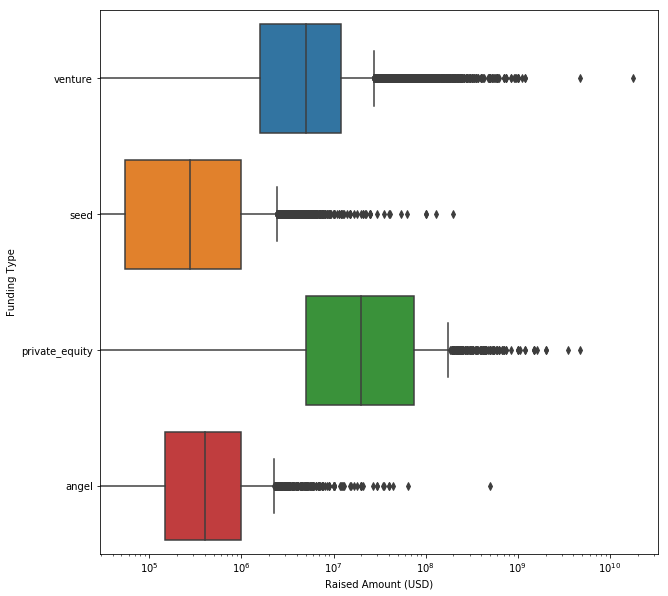

In [32]:
# Plot the data frame to find the outliers

plt.figure(figsize=(10, 10))
sns.boxplot(x = 'raised_amount_usd' , y = 'funding_round_type',data = df_fund_type)
plt.xscale('log')
plt.xlabel('Raised Amount (USD)')
plt.ylabel('Funding Type')
plt.show()

In [33]:
# Check for data skewness

df_fund_type.groupby('funding_round_type')['raised_amount_usd'].skew()

funding_round_type
angel             61.32
private_equity    12.04
seed              49.45
venture          172.10
Name: raised_amount_usd, dtype: float64

In [34]:
# Find the min and max values for each investment type

df_fund_type.groupby('funding_round_type')['raised_amount_usd'].agg([np.min,np.max])

,amin,amax
funding_round_type,,
angel,0.00,494511992.00
private_equity,0.00,4745460219.00
seed,0.00,200000000.00
venture,0.00,17600000000.00


In [35]:
# Find the mean and median values for each investment type 

df_fund_type_mean_median = df_fund_type.groupby('funding_round_type')['raised_amount_usd'].agg([np.mean,np.median]).reset_index()
df_fund_type_mean_median

,funding_round_type,mean,median
0,angel,958694.47,400000.00
1,private_equity,73308593.03,20000000.00
2,seed,719818.00,275000.00
3,venture,11748949.13,5000000.00


Since the data skewedness is very high, consider the mean and median values to find the best investment type.<br><br> 

In [36]:
# Find the best investment type based on 5 to 15 million constraint

fund_type = df_fund_type.groupby('funding_round_type')['raised_amount_usd'].mean().between(5000000,15000000).reset_index(name='case')
fund_type.loc[fund_type['case']==True,'funding_round_type'].iloc[0]

'venture'

## Country Analysis

In [37]:
# Filter the dataframe based on the best investment type

df_country = df_fund_type[(df_fund_type.funding_round_type == fund_type.loc[fund_type['case']==True,'funding_round_type'].iloc[0])]

df_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50228 entries, 0 to 94952
Data columns (total 9 columns):
company_permalink          50228 non-null object
funding_round_permalink    50228 non-null object
funding_round_type         50228 non-null object
funded_at                  50228 non-null object
raised_amount_usd          50228 non-null float64
name                       50228 non-null object
category_list              50228 non-null object
status                     50228 non-null object
country_code               50228 non-null object
dtypes: float64(1), object(8)
memory usage: 3.8+ MB


In [38]:
# Data frame, top9, with the top nine countries based on the total investment amount each country has received

top9 = df_country.groupby(['country_code'])['raised_amount_usd'].agg('sum').reset_index(name='raised_amount_usd')
top9.sort_values(by = 'raised_amount_usd', ascending = False,inplace =True)
top9 = top9.head(10)
top9

,country_code,raised_amount_usd
94,USA,448016951210.00
15,CHN,39835418773.00
29,GBR,20245627416.00
39,IND,14391858718.00
12,CAN,9583332317.00
28,FRA,7259536732.00
42,ISR,6907514579.00
21,DEU,6346959822.00
45,JPN,3363676611.00
84,SWE,3254952563.00


### Web Scraping

Web Scraping is done on the wikipedia link for finding the countries with English as official language. 
Here the "List_of_territorial_entities_where_English_is_an_official_language" is web scraped for the English speaking countries.<br><br>

In [39]:
# Import the wikipedia module for web scraping wikipedia link

import wikipedia as wp
 
#Get the html source

html = wp.page("List_of_territorial_entities_where_English_is_an_official_language").html().encode("UTF-8")

# Web Scrape the first table in the link

df0 = pd.read_html(html)[0]
df0.to_csv('beautifulsoup_pandas.csv',header=0,index=False)

# Store as the data as data frame

df0 = pd.DataFrame(df0)
df0.head()

,Nr,Country,Region,Population,Primary language?
0,1,Australia,Oceania,25019600,Yes
1,2,New Zealand[1],Oceania,4893830,Yes
2,3,United Kingdom,Europe,66040229,Yes
3,4,United States,North America,325719178,Yes


In [40]:
# Web Scrape the second table in the link

df1 = pd.read_html(html)[1]
df1.to_csv('beautifulsoup_pandas.csv',header=0,index=False)

# Store as the data as data frame

df1 = pd.DataFrame(df1)
df1.head()

,Nr,Country,Region,Population1,Primary language?
0,1.00,Antigua and Barbuda[2],Caribbean,85000,Yes
1,2.00,Bahamas[2],Caribbean,331000,Yes
2,3.00,Barbados[3],Caribbean,294000,Yes
3,4.00,Belize[4],Central America,288000,Yes
4,5.00,Botswana[4],Africa,1882000,No


In [41]:
# Merge the two data frames as one

country = pd.concat([df0, df1], sort=True)
country.head()

,Country,Nr,Population,Population1,Primary language?,Region
0,Australia,1.00,25019600.00,NaN,Yes,Oceania
1,New Zealand[1],2.00,4893830.00,NaN,Yes,Oceania
2,United Kingdom,3.00,66040229.00,NaN,Yes,Europe
3,United States,4.00,325719178.00,NaN,Yes,North America
0,Antigua and Barbuda[2],1.00,nan,85000,Yes,Caribbean


In [42]:
# Drop the columns not required for this analysis

country.drop(['Nr','Population', 'Population1', 'Region'], axis = 'columns', inplace = True)
country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 56
Data columns (total 2 columns):
Country              61 non-null object
Primary language?    61 non-null object
dtypes: object(2)
memory usage: 1.4+ KB


In [43]:
# Remove the characters and digits from Country column

country.loc[:,'Country'] = country['Country'].apply(lambda s: s.split('[')[0].split('1')[0])
country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 56
Data columns (total 2 columns):
Country              61 non-null object
Primary language?    61 non-null object
dtypes: object(2)
memory usage: 1.4+ KB


<br> Here web scraping is done to find the country codes for the above data frame.<br>

In [61]:
#Get the html source

html = wp.page("ISO 3166-1").html().encode("UTF-8")
country_code = pd.read_html(html)[1]
country_code.to_csv('beautifulsoup_pandas.csv',header=0,index=False)

# Store as the data as data frame

country_code = pd.DataFrame(country_code)
country_code.head()

,English short name (using title case),Alpha-2 code,Alpha-3 code,Numeric code,Link to ISO 3166-2 subdivision codes,Independent
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Yes
1,Ã land Islands,AX,ALA,248,ISO 3166-2:AX,No
2,Albania,AL,ALB,8,ISO 3166-2:AL,Yes
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Yes
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,No


In [62]:
# Remove the column not required for this analysis and rename the columns

country_code = country_code[['English short name (using title case)', 'Alpha-3 code']]
country_code.columns = ['country','country_code']

In [63]:
# Remove the characters and digits from Country column

country_code['country'] = country_code['country'].apply(lambda s: s.split(' (')[0].split(',')[0])

In [64]:
# Data frame info

country_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
country         249 non-null object
country_code    249 non-null object
dtypes: object(2)
memory usage: 4.0+ KB


In [65]:
#Find the countries not present in country_code data frame

country[country['Country'].isin(country_code['country'])==False]

,Country,Primary language?
2,United Kingdom,Yes
3,United States,Yes
12,The Gambia,No
27,Federated States of Micronesia,No
45,Somaliland,"No (but official, alongside Somali and Arabic)"


In [66]:
# Check if the values are present in any other form

country_code[country_code['country'].str.contains(r'United|Gambia|Micronesia|Somaliland')]

,country,country_code
81,Gambia,GMB
144,Micronesia,FSM
233,United Arab Emirates,ARE
234,United Kingdom of Great Britain and Northern I...,GBR
235,United States of America,USA
236,United States Minor Outlying Islands,UMI


In [67]:
# Replace country name as in country_code data frame

country['Country'] = country['Country'].replace(to_replace = ['United Kingdom','United States','The Gambia','Federated States of Micronesia'],
                          value = ['United Kingdom of Great Britain and Northern Ireland', 'United States of America', 'Gambia','Micronesia'])

In [68]:
# Merge the country and aountry_code data frame 

df_country_code = pd.merge(country, country_code, how = 'left', left_on = 'Country', right_on = 'country')
df_country_code.head()

,Country,Primary language?,country,country_code
0,Australia,Yes,Australia,AUS
1,New Zealand,Yes,New Zealand,NZL
2,United Kingdom of Great Britain and Northern I...,Yes,United Kingdom of Great Britain and Northern I...,GBR
3,United States of America,Yes,United States of America,USA
4,Antigua and Barbuda,Yes,Antigua and Barbuda,ATG


In [69]:
# Drop the common column

df_country_code.drop(['country'], axis = 'columns', inplace = True)
df_country_code.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 3 columns):
Country              61 non-null object
Primary language?    61 non-null object
country_code         60 non-null object
dtypes: object(3)
memory usage: 1.9+ KB


In [70]:
# Merge the top9 and df_country_code to find the English speaking countries

merged_top9 = pd.merge(top9, df_country_code, how = 'left', left_on = 'country_code', right_on = 'country_code')
merged_top9.head(10)

,country_code,raised_amount_usd,Country,Primary language?
0,USA,448016951210.00,United States of America,Yes
1,CHN,39835418773.00,NaN,NaN
2,GBR,20245627416.00,United Kingdom of Great Britain and Northern I...,Yes
3,IND,14391858718.00,India,No (but official and educational)
4,CAN,9583332317.00,Canada,"Yes (except Quebec, northern New Brunswick)"
5,FRA,7259536732.00,NaN,NaN
6,ISR,6907514579.00,NaN,NaN
7,DEU,6346959822.00,NaN,NaN
8,JPN,3363676611.00,NaN,NaN
9,SWE,3254952563.00,NaN,NaN


In [71]:
# Drop the common column

merged_top9.drop(['Country'], axis = 'columns', inplace = True)

# Remove the rows with NaN in Primary language? column

merged_top9 = merged_top9[~pd.isnull(merged_top9['Primary language?'])]

# Replace 'No (but official and educational)' as'Yes' as they are same

merged_top9['Primary language?'] = merged_top9['Primary language?'].replace('No (but official and educational)','Yes')

merged_top9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 4
Data columns (total 3 columns):
country_code         4 non-null object
raised_amount_usd    4 non-null float64
Primary language?    4 non-null object
dtypes: float64(1), object(2)
memory usage: 128.0+ bytes


In [72]:
# Find the 'Primary language?'=='Yes' values and rank them

merged_top9 = merged_top9[merged_top9['Primary language?']=='Yes']

merged_top9.loc[:,'rank'] = merged_top9['raised_amount_usd'].rank(ascending=False).astype(int)

merged_top9

,country_code,raised_amount_usd,Primary language?,rank
0,USA,448016951210.00,Yes,1
2,GBR,20245627416.00,Yes,2
3,IND,14391858718.00,Yes,3


## Sector Analysis 1

In [73]:
# Filter the data frame with rank 1, 2 and 3

df_sector = df_country[(df_country.country_code == merged_top9.loc[merged_top9['rank'] == 1, 'country_code'].iloc[0]) | 
                       (df_country.country_code == merged_top9.loc[merged_top9['rank'] == 2, 'country_code'].iloc[0]) | 
                       (df_country.country_code == merged_top9.loc[merged_top9['rank'] == 3, 'country_code'].iloc[0])]

df_sector.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41135 entries, 0 to 94947
Data columns (total 9 columns):
company_permalink          41135 non-null object
funding_round_permalink    41135 non-null object
funding_round_type         41135 non-null object
funded_at                  41135 non-null object
raised_amount_usd          41135 non-null float64
name                       41135 non-null object
category_list              41135 non-null object
status                     41135 non-null object
country_code               41135 non-null object
dtypes: float64(1), object(8)
memory usage: 3.1+ MB


In [74]:
# Data frame info

df_sector.shape

(41135, 9)

In [75]:
# Separate the primary sector from the category list

df_sector.loc[:,'primary_sector'] = df_sector['category_list'].apply(lambda s: s.split('|')[0])
df_sector.head()

C:\Users\Thomas\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Thomas\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,#fame,Media,operating,IND,Media
2,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.00,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,USA,Apps
8,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,H2O.ai,Analytics,operating,USA,Analytics
9,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,H2O.ai,Analytics,operating,USA,Analytics
10,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00,H2O.ai,Analytics,operating,USA,Analytics


In [76]:
# Load the mapping.csv

mapping = pd.read_csv('./mapping.csv')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [77]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.8+ KB


In [78]:
# Find the null values

mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [79]:
# Remove the rows with NaN

mapping = mapping[~pd.isnull(mapping['category_list'])]
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [80]:
# To lower_case

df_sector['primary_sector'] = df_sector['primary_sector'].str.lower()
mapping['category_list'] = mapping['category_list'].str.lower()

C:\Users\Thomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [81]:
# Find sectors not in mapping file

df_sector['primary_sector'].isin(mapping['category_list']).value_counts()

True     38433
False     2702
Name: primary_sector, dtype: int64

In [82]:
# Check for the data quality

mapping.loc[~mapping['category_list'].isin(df_sector['primary_sector']),:]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,air pollution control,0,0,1,0,0,0,0,0,0
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
33,aquaculture,0,0,1,0,0,0,0,0,0
49,b2b express delivery,0,0,0,0,0,0,0,0,1
59,big data a0lytics,0,0,0,0,0,0,0,0,1
64,biomass power generation,0,0,1,0,0,0,0,0,0
69,boating industry,1,0,0,0,0,0,0,0,0
77,building owners,0,0,0,0,0,0,1,0,0
79,business a0lytics,0,0,0,0,0,0,0,0,1


In [83]:
# Replace 0 with na for data quality

mapping['category_list'] = [x.strip().replace('0', 'na') for x in mapping['category_list']]

In [84]:
# Find sectors not in mapping file

df_sector['primary_sector'].isin(mapping['category_list']).value_counts()

True     41119
False       16
Name: primary_sector, dtype: int64

In [85]:
# Find sectors not in mapping file

x = df_sector.loc[~df_sector['primary_sector'].isin(mapping['category_list']),:]
x['primary_sector'].drop_duplicates()
x['primary_sector'].sort_values()

23828                 adaptive equipment
87645                 adaptive equipment
36019    biotechnology and semiconductor
19175                     enterprise 2.0
19177                     enterprise 2.0
30197                     enterprise 2.0
58517                     enterprise 2.0
72561                          greentech
16954                   natural gas uses
34107                          nightlife
57962                     product search
29385                             racing
42922                  rapidly expanding
73144                         retirement
73145                         retirement
29975                   specialty retail
Name: primary_sector, dtype: object

In [86]:
# Replace na with 0 for data quality

mapping['category_list'] = [x.strip().replace('2.na', '2.0') for x in mapping['category_list']]

In [87]:
df_sector['primary_sector'].isin(mapping['category_list']).value_counts()

True     41123
False       12
Name: primary_sector, dtype: int64

In [88]:
(mapping['Blanks'] == 0).all()

True

In [89]:
# Remove column with all values 0

mapping.drop(['Blanks'],axis = 'columns', inplace = True)
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 1 to 687
Data columns (total 9 columns):
category_list                              687 non-null object
Automotive & Sports                        687 non-null int64
Cleantech / Semiconductors                 687 non-null int64
Entertainment                              687 non-null int64
Health                                     687 non-null int64
Manufacturing                              687 non-null int64
News, Search and Messaging                 687 non-null int64
Others                                     687 non-null int64
Social, Finance, Analytics, Advertising    687 non-null int64
dtypes: int64(8), object(1)
memory usage: 53.7+ KB


In [90]:
# Mapping to eight sectors

value_vars = mapping.columns[1:].to_list()
mapping =  pd.melt(mapping, id_vars =['category_list'], value_vars =value_vars, var_name = 'main_sector') 
mapping = mapping[~(mapping.value == 0)]
mapping = mapping.drop('value', axis = 1)
mapping.head()

,category_list,main_sector
7,adventure travel,Automotive & Sports
13,aerospace,Automotive & Sports
44,auto,Automotive & Sports
45,automated kiosk,Automotive & Sports
46,automotive,Automotive & Sports


In [91]:
# Merge the files for mapping

df = pd.merge(df_sector, mapping, how = 'left', left_on = 'primary_sector', right_on = 'category_list')

df.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,category_list_y,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,#fame,Media,operating,IND,media,media,Entertainment
1,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.00,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,USA,apps,apps,"News, Search and Messaging"
2,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,H2O.ai,Analytics,operating,USA,analytics,analytics,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,H2O.ai,Analytics,operating,USA,analytics,analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00,H2O.ai,Analytics,operating,USA,analytics,analytics,"Social, Finance, Analytics, Advertising"


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41135 entries, 0 to 41134
Data columns (total 12 columns):
company_permalink          41135 non-null object
funding_round_permalink    41135 non-null object
funding_round_type         41135 non-null object
funded_at                  41135 non-null object
raised_amount_usd          41135 non-null float64
name                       41135 non-null object
category_list_x            41135 non-null object
status                     41135 non-null object
country_code               41135 non-null object
primary_sector             41135 non-null object
category_list_y            41123 non-null object
main_sector                41123 non-null object
dtypes: float64(1), object(11)
memory usage: 4.1+ MB


## Sector Analysis 2

In [93]:
D1 = df.loc[(df['country_code']==merged_top9.loc[merged_top9['rank'] == 1, 'country_code'].iloc[0]) & (df['raised_amount_usd'] >= 5000000) & 
        (df['raised_amount_usd'] <= 15000000)]
D1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12853 entries, 4 to 41134
Data columns (total 12 columns):
company_permalink          12853 non-null object
funding_round_permalink    12853 non-null object
funding_round_type         12853 non-null object
funded_at                  12853 non-null object
raised_amount_usd          12853 non-null float64
name                       12853 non-null object
category_list_x            12853 non-null object
status                     12853 non-null object
country_code               12853 non-null object
primary_sector             12853 non-null object
category_list_y            12852 non-null object
main_sector                12852 non-null object
dtypes: float64(1), object(11)
memory usage: 1.3+ MB


In [94]:
D1.loc[:,'investments_total_count'] = D1.groupby('main_sector')['main_sector'].transform('count').fillna(0).astype(int)
D1.loc[:,'investments_total_amount'] = D1.groupby('main_sector')['raised_amount_usd'].transform('sum')

In [95]:
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,category_list_y,main_sector,investments_total_count,investments_total_amount
4,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00,H2O.ai,Analytics,operating,USA,analytics,analytics,"Social, Finance, Analytics, Advertising",2834,24909298703.00
5,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.00,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,apps,apps,"News, Search and Messaging",1684,14887298950.00
19,/organization/123greetings,/funding-round/5dd1821a92088ff96b467eb16431731a,venture,23-07-2015,5400000.00,123Greetings,Internet,operating,USA,internet,internet,"News, Search and Messaging",1684,14887298950.00
20,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11999347.00,128 Technology,Service Providers|Technology,operating,USA,service providers,service providers,Others,3090,27454532077.00
23,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15-10-2013,15000000.00,1366 Technologies,Manufacturing,operating,USA,manufacturing,manufacturing,Manufacturing,857,7801044363.00


In [99]:
D2 = df[(df['country_code']==merged_top9.loc[merged_top9['rank'] == 2, 'country_code'].iloc[0]) & (df['raised_amount_usd'] >= 5000000) & 
        (df['raised_amount_usd'] <= 15000000)]
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,category_list_y,main_sector
116,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,5500000.00,365Scores,Android|Apps|iPhone|Mobile|Sports,operating,GBR,android,android,"Social, Finance, Analytics, Advertising"
250,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,01-01-2008,8468328.00,7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,content creators,content creators,Entertainment
251,/organization/7digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,19-10-2012,10000000.00,7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,content creators,content creators,Entertainment
276,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.00,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,media,Entertainment
277,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.00,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,media,Entertainment


In [100]:
D2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 116 to 41128
Data columns (total 12 columns):
company_permalink          628 non-null object
funding_round_permalink    628 non-null object
funding_round_type         628 non-null object
funded_at                  628 non-null object
raised_amount_usd          628 non-null float64
name                       628 non-null object
category_list_x            628 non-null object
status                     628 non-null object
country_code               628 non-null object
primary_sector             628 non-null object
category_list_y            628 non-null object
main_sector                628 non-null object
dtypes: float64(1), object(11)
memory usage: 63.8+ KB


In [101]:
D2.loc[:,'investments_total_count'] = D2.groupby('main_sector')['main_sector'].transform('count').fillna(0).astype(int)
D2.loc[:,'investments_total_amount'] = D2.groupby('main_sector')['raised_amount_usd'].transform('sum')

In [102]:
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,category_list_y,main_sector,investments_total_count,investments_total_amount
116,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,5500000.00,365Scores,Android|Apps|iPhone|Mobile|Sports,operating,GBR,android,android,"Social, Finance, Analytics, Advertising",133,1089404014.00
250,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,01-01-2008,8468328.00,7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,content creators,content creators,Entertainment,56,482784687.00
251,/organization/7digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,19-10-2012,10000000.00,7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,content creators,content creators,Entertainment,56,482784687.00
276,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.00,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,media,Entertainment,56,482784687.00
277,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.00,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,media,Entertainment,56,482784687.00


In [103]:
D3 = df[(df['country_code']==merged_top9.loc[merged_top9['rank'] == 3, 'country_code'].iloc[0]) & (df['raised_amount_usd'] >= 5000000) & 
        (df['raised_amount_usd'] <= 15000000)]
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,category_list_y,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,#fame,Media,operating,IND,media,media,Entertainment
60,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.00,21Diamonds,E-Commerce,operating,IND,e-commerce,e-commerce,Others
299,/organization/a-little-world,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,09-09-2008,6410000.00,A LITTLE WORLD,Finance,operating,IND,finance,finance,"Social, Finance, Analytics, Advertising"
993,/organization/adlabs-imagica,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,28-10-2014,8180000.00,Adlabs Imagica,Entertainment|Tourism,operating,IND,entertainment,entertainment,Entertainment
1346,/organization/agile,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,01-05-2011,5740000.00,Agile,Finance|Finance Technology|FinTech|Insurance,operating,IND,finance,finance,"Social, Finance, Analytics, Advertising"


In [104]:
D3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 0 to 41023
Data columns (total 12 columns):
company_permalink          330 non-null object
funding_round_permalink    330 non-null object
funding_round_type         330 non-null object
funded_at                  330 non-null object
raised_amount_usd          330 non-null float64
name                       330 non-null object
category_list_x            330 non-null object
status                     330 non-null object
country_code               330 non-null object
primary_sector             330 non-null object
category_list_y            330 non-null object
main_sector                330 non-null object
dtypes: float64(1), object(11)
memory usage: 33.5+ KB


In [105]:
D3.loc[:,'investments_total_count'] = D3.groupby('main_sector')['main_sector'].transform('count').fillna(0).astype(int)
D3.loc[:,'investments_total_amount'] = D3.groupby('main_sector')['raised_amount_usd'].transform('sum')

In [106]:
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,category_list_y,main_sector,investments_total_count,investments_total_amount
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,#fame,Media,operating,IND,media,media,Entertainment,33,280830000.00
60,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.00,21Diamonds,E-Commerce,operating,IND,e-commerce,e-commerce,Others,110,1013409507.00
299,/organization/a-little-world,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,09-09-2008,6410000.00,A LITTLE WORLD,Finance,operating,IND,finance,finance,"Social, Finance, Analytics, Advertising",60,550549550.00
993,/organization/adlabs-imagica,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,28-10-2014,8180000.00,Adlabs Imagica,Entertainment|Tourism,operating,IND,entertainment,entertainment,Entertainment,33,280830000.00
1346,/organization/agile,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,01-05-2011,5740000.00,Agile,Finance|Finance Technology|FinTech|Insurance,operating,IND,finance,finance,"Social, Finance, Analytics, Advertising",60,550549550.00


In [107]:
print("Total number of investments (count):")
print('Country 1({0}) - {1}'.format(D1.iloc[0]['country_code'],D1['investments_total_count'].count()))
print('Country 2({0}) - {1}'.format(D2.iloc[0]['country_code'],D2['investments_total_count'].count()))
print('Country 3({0}) - {1}'.format(D3.iloc[0]['country_code'],D3['investments_total_count'].count()))

Total number of investments (count):
Country 1(USA) - 12853
Country 2(GBR) - 628
Country 3(IND) - 330


In [108]:
print("Total amount of investment (USD):")
print('Country 1({0}) - USD {1}'.format(D1.iloc[0]['country_code'],'{:.2f}'.format(D1['raised_amount_usd'].sum())))
print('Country 2({0}) - USD {1}'.format(D2.iloc[0]['country_code'],'{:.2f}'.format(D2['raised_amount_usd'].sum())))
print('Country 3({0}) - USD {1}'.format(D3.iloc[0]['country_code'],'{:.2f}'.format(D3['raised_amount_usd'].sum())))

Total amount of investment (USD):
Country 1(USA) - USD 114711887866.00
Country 2(GBR) - USD 5436843539.00
Country 3(IND) - USD 2976543602.00


In [109]:
D1_rank = D1.filter(['main_sector','investments_total_count','investments_total_amount']).drop_duplicates()
D1_rank['rank_count'] = D1_rank['investments_total_count'].rank(ascending=False).astype(int)

D2_rank = D2.filter(['main_sector','investments_total_count','investments_total_amount']).drop_duplicates()
D2_rank['rank_count'] = D2_rank['investments_total_count'].rank(ascending=False).astype(int)

D3_rank = D3.filter(['main_sector','investments_total_count','investments_total_amount']).drop_duplicates()
D3_rank['rank_count'] = D3_rank['investments_total_count'].rank(ascending=False).astype(int)

In [110]:
print("Top sector (based on count of investments):")
print('Country 1({0}) - {1}'.format(D1.iloc[0]['country_code'],D1_rank.loc[D1_rank['rank_count'] == 1, 'main_sector'].iloc[0]))
print('Country 2({0}) - {1}'.format(D2.iloc[0]['country_code'],D2_rank.loc[D2_rank['rank_count'] == 1, 'main_sector'].iloc[0]))
print('Country 3({0}) - {1}'.format(D3.iloc[0]['country_code'],D3_rank.loc[D3_rank['rank_count'] == 1, 'main_sector'].iloc[0]))

Top sector (based on count of investments):
Country 1(USA) - Others
Country 2(GBR) - Others
Country 3(IND) - Others


In [111]:
print('Second-best sector (based on count of investments):')
print('Country 1({0}) - {1}'.format(D1.iloc[0]['country_code'],D1_rank.loc[D1_rank['rank_count'] == 2, 'main_sector'].iloc[0]))
print('Country 2({0}) - {1}'.format(D2.iloc[0]['country_code'],D2_rank.loc[D2_rank['rank_count'] == 2, 'main_sector'].iloc[0]))
print('Country 3({0}) - {1}'.format(D3.iloc[0]['country_code'],D3_rank.loc[D3_rank['rank_count'] == 2, 'main_sector'].iloc[0]))

Second-best sector (based on count of investments):
Country 1(USA) - Social, Finance, Analytics, Advertising
Country 2(GBR) - Cleantech / Semiconductors
Country 3(IND) - Social, Finance, Analytics, Advertising


In [112]:
print("Third-best sector (based on count of investments):")
print('Country 1({0}) - {1}'.format(D1.iloc[0]['country_code'],D1_rank.loc[D1_rank['rank_count'] == 3, 'main_sector'].iloc[0]))
print('Country 2({0}) - {1}'.format(D2.iloc[0]['country_code'],D2_rank.loc[D2_rank['rank_count'] == 3, 'main_sector'].iloc[0]))
print('Country 3({0}) - {1}'.format(D3.iloc[0]['country_code'],D3_rank.loc[D3_rank['rank_count'] == 3, 'main_sector'].iloc[0]))

Third-best sector (based on count of investments):
Country 1(USA) - Cleantech / Semiconductors
Country 2(GBR) - Social, Finance, Analytics, Advertising
Country 3(IND) - News, Search and Messaging


In [113]:
print("Number of investments in the top sector:")
print('Country 1({0}) - {1}'.format(D1.iloc[0]['country_code'],D1_rank.loc[D1_rank['rank_count'] == 1, 'investments_total_count'].iloc[0]))
print('Country 2({0}) - {1}'.format(D2.iloc[0]['country_code'],D2_rank.loc[D2_rank['rank_count'] == 1, 'investments_total_count'].iloc[0]))
print('Country 3({0}) - {1}'.format(D3.iloc[0]['country_code'],D3_rank.loc[D3_rank['rank_count'] == 1, 'investments_total_count'].iloc[0]))

Number of investments in the top sector:
Country 1(USA) - 3090
Country 2(GBR) - 147
Country 3(IND) - 110


In [114]:
print('Number of investments in the second-best sector:')
print('Country 1({0}) - {1}'.format(D1.iloc[0]['country_code'],D1_rank.loc[D1_rank['rank_count'] == 2, 'investments_total_count'].iloc[0]))
print('Country 2({0}) - {1}'.format(D2.iloc[0]['country_code'],D2_rank.loc[D2_rank['rank_count'] == 2, 'investments_total_count'].iloc[0]))
print('Country 3({0}) - {1}'.format(D3.iloc[0]['country_code'],D3_rank.loc[D3_rank['rank_count'] == 2, 'investments_total_count'].iloc[0]))

Number of investments in the second-best sector:
Country 1(USA) - 2834
Country 2(GBR) - 137
Country 3(IND) - 60


In [115]:
print("Number of investments in the third-best sector:")
print('Country 1({0}) - {1}'.format(D1.iloc[0]['country_code'],D1_rank.loc[D1_rank['rank_count'] == 3, 'investments_total_count'].iloc[0]))
print('Country 2({0}) - {1}'.format(D2.iloc[0]['country_code'],D2_rank.loc[D2_rank['rank_count'] == 3, 'investments_total_count'].iloc[0]))
print('Country 3({0}) - {1}'.format(D3.iloc[0]['country_code'],D3_rank.loc[D3_rank['rank_count'] == 3, 'investments_total_count'].iloc[0]))

Number of investments in the third-best sector:
Country 1(USA) - 2602
Country 2(GBR) - 133
Country 3(IND) - 52


In [116]:
D1_investment = D1[(D1['main_sector']==D1_rank.loc[D1_rank['rank_count'] == 1, 'main_sector'].iloc[0])]
grouped_df = D1_investment.groupby(['company_permalink','name'])['raised_amount_usd'].agg('sum').reset_index(name='value_sum')
grouped_df.sort_values(by = 'value_sum', ascending=False,inplace =True)
d1 = grouped_df[grouped_df['value_sum']==grouped_df['value_sum'].iloc[0]]['name'].iloc[0]

In [117]:
D2_investment = D2[(D2['main_sector']==D2_rank.loc[D2_rank['rank_count'] == 1, 'main_sector'].iloc[0])]
grouped_df = D2_investment.groupby(['company_permalink','name'])['raised_amount_usd'].agg('sum').reset_index(name='value_sum')
grouped_df.sort_values(by = 'value_sum', ascending=False,inplace =True)
d2 = grouped_df[grouped_df['value_sum']==grouped_df['value_sum'].iloc[0]]['name'].iloc[0]

In [118]:
D3_investment = D3[(D3['main_sector']==D3_rank.loc[D3_rank['rank_count'] == 1, 'main_sector'].iloc[0])]
grouped_df = D3_investment.groupby(['company_permalink','name'])['raised_amount_usd'].agg('sum').reset_index(name='value_sum')
grouped_df.sort_values(by = 'value_sum', ascending=False,inplace =True)
d3 = grouped_df[grouped_df['value_sum']==grouped_df['value_sum'].iloc[0]]['name'].iloc[0]

In [119]:
print("For the top sector count-wise, which company received the highest investment:")
print('Country 1({0}) - {1}'.format(D1.iloc[0]['country_code'],d1))
print('Country 2({0}) - {1}'.format(D2.iloc[0]['country_code'],d2))
print('Country 3({0}) - {1}'.format(D3.iloc[0]['country_code'],d3))

For the top sector count-wise, which company received the highest investment:
Country 1(USA) - Virtustream
Country 2(GBR) - Electric Cloud
Country 3(IND) - FirstCry.com


In [120]:
D1_investment = D1[(D1['main_sector']==D1_rank.loc[D1_rank['rank_count'] == 2, 'main_sector'].iloc[0])]
grouped_df = D1_investment.groupby(['company_permalink','name'])['raised_amount_usd'].agg('sum').reset_index(name='value_sum')
grouped_df.sort_values(by = 'value_sum', ascending=False,inplace =True)
d1 = grouped_df[grouped_df['value_sum']==grouped_df['value_sum'].max()]['name'].iloc[0]

In [121]:
D2_investment = D2[(D2['main_sector']==D2_rank.loc[D2_rank['rank_count'] == 2, 'main_sector'].iloc[0])]
grouped_df = D2_investment.groupby(['company_permalink','name'])['raised_amount_usd'].agg('sum').reset_index(name='value_sum')
grouped_df.sort_values(by = 'value_sum', ascending=False,inplace =True)
d2 = grouped_df[grouped_df['value_sum']==grouped_df['value_sum'].iloc[0]]['name'].iloc[0]

In [122]:
D3_investment = D3[(D3['main_sector']==D3_rank.loc[D3_rank['rank_count'] == 2, 'main_sector'].iloc[0])]
grouped_df = D3_investment.groupby(['company_permalink','name'])['raised_amount_usd'].agg('sum').reset_index(name='value_sum')
grouped_df.sort_values(by = 'value_sum', ascending=False,inplace =True)
d3 = grouped_df[grouped_df['value_sum']==grouped_df['value_sum'].iloc[0]]['name'].iloc[0]

In [123]:
print("For the second-best sector count-wise, which company received the highest investment:")
print('Country 1({0}) - {1}'.format(D1.iloc[0]['country_code'],d1))
print('Country 2({0}) - {1}'.format(D2.iloc[0]['country_code'],d2))
print('Country 3({0}) - {1}'.format(D3.iloc[0]['country_code'],d3))

For the second-best sector count-wise, which company received the highest investment:
Country 1(USA) - SST Inc. (Formerly ShotSpotter)
Country 2(GBR) - EUSA Pharma
Country 3(IND) - Manthan Systems


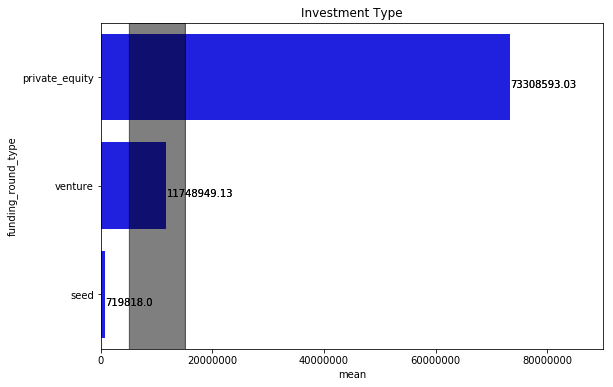

In [124]:
# Investment Type

plot_df= df_fund_type_mean_median.loc[((df_fund_type_mean_median['funding_round_type']=='venture') | 
                                      (df_fund_type_mean_median['funding_round_type']=='seed') | 
                                      (df_fund_type_mean_median['funding_round_type']=='private_equity'))].sort_values('mean',ascending=False)

plt.figure(figsize=(9,6))
ax = sns.barplot(x='mean',y='funding_round_type',data=plot_df,color='blue')

for i in ax.patches:
    ax.text(i.get_width()+.1, i.get_y()+0.5,str(round((i.get_width()), 2)), fontsize=10, color='k')
    ax.text(i.get_width()+.1, i.get_y()+0.5,str(round((i.get_width()), 2)), fontsize=10, color='k')


plt.axvline(5000000, color='k',alpha=0.1)
plt.axvline(15000000, color='k',alpha=0.1)
ax.axvspan(5000000, 15000000, color='k',alpha=0.5)
plt.xlim([0,90000000])
plt.xticks(np.arange(0,90000000,20000000))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Investment Type')

plt.show()

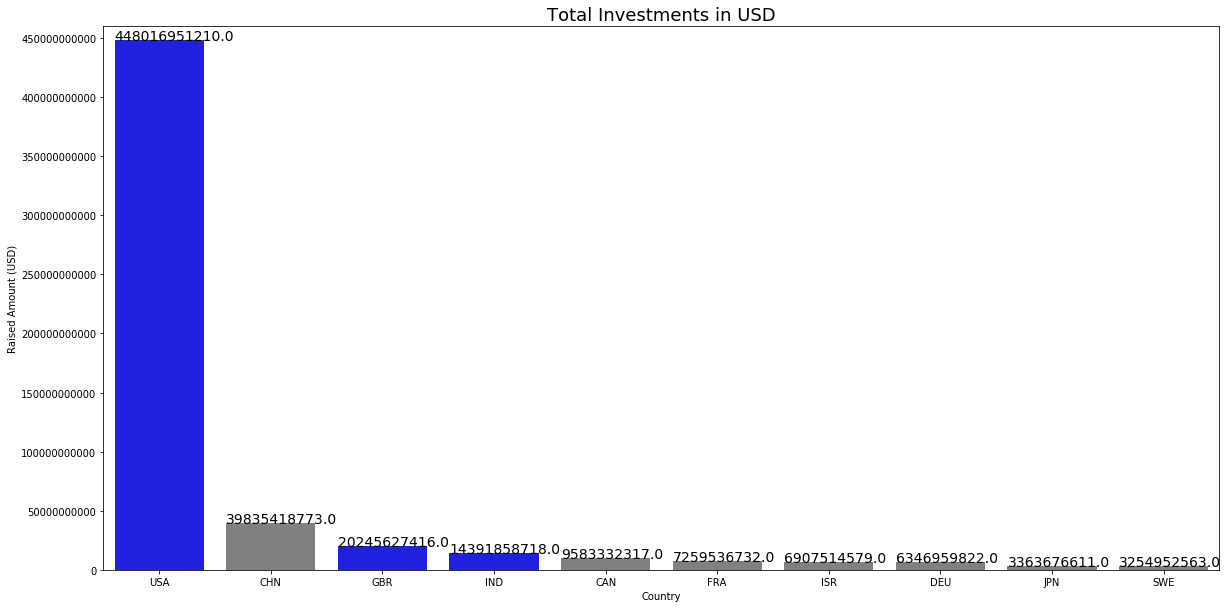

In [126]:
# Country Analysis

plt.figure(figsize=(20,10))
colors = []
for value in top9.country_code.tolist(): # keys are the names of the boys
    if value in merged_top9.country_code.tolist():
        colors.append('blue')
    else:
        colors.append('grey')

ax = sns.barplot(x='country_code',y='raised_amount_usd',data=top9, palette = colors)

for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.001, i.get_height()+0.5, \
            str(round((i.get_height()), 2)), fontsize=14, color='k')
ax.set(xlabel='Country', ylabel='Raised Amount (USD)')
ax.set_title('Total Investments in USD',fontsize =18)


plt.ylim([0,460000000000])
plt.yticks(np.arange(0,460000000000,50000000000))
plt.ticklabel_format(style='plain', axis='y')

plt.show()
#c.set_ylim(0, 100000000000)
#c.set_yscale('log')

plt.show()

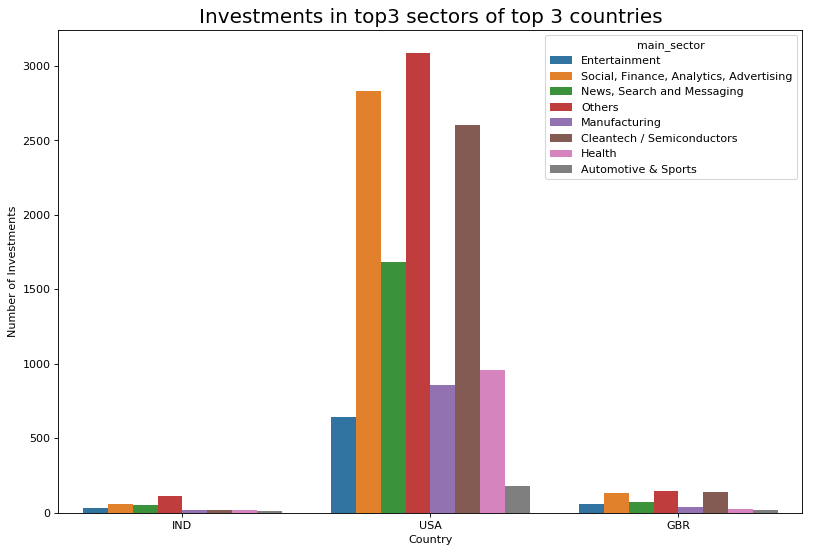

In [130]:
plot_df = df.loc[(df['raised_amount_usd'] >= 5000000) & (df['raised_amount_usd'] <= 15000000)]

# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
s=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=plot_df,estimator=lambda x: len(x))
s.set(xlabel='Country', ylabel='Number of Investments')
s.set_title('Investments in top3 sectors of top 3 countries',fontsize =18)
plt.show()

### Conclusion

Spark Funds has two minor constraints for investments
<ol>
<li> Invest between **`5 to 15 million USD`** per round of investment. </li>
<li> Invest only in **`English speaking countries`** because of the ease of communication with the companies. </li>
</ol>

On the basis of the analysis, considering the two constraints:
<ul>
<li> The suitable investment type is Venture. </li>
<li> Top three English Speaking countries to invest are: USA, GBR, IND. </li>
<li> Others sector has the highest investment from the top 3 countries. </li>
</ul>
<br>
>> Hence, Venture is the best recommended investment type.
<br>
>> USA with highest count and amount of investments becomes the suitable country for investment.
<br>
>> Others sector is the suitable sector for investment.
<br>
>> GBR and IND also has a chance for investment.